The notebook is a compilation of the usual machine learning metrics. 

Note that the metrics are related to the **loss function that ML algorithm actually is optimizing**, but the two are different, and sometimes this causes the performance gap between 'doing well on the test set' vs 'doing well in practice'. 
- Oftentimes, it is **actually the metric, which has a business background or intuitive to understand**, and that we want to truly optimize, **but we cannot since it is not differentiable**. 
    - For instance, the accuracy metric is actually equivalent to a 0-1 loss function, but it is not differentiable and hence cannot be used in ML algorithm.  
    - The loss function used instead, such as **cross-entropy**, is a differentiable alternative or proxy to the metric, or classification calibrated **surrogate losses**; see concrete examples below.
- Other cases of performance gap arise when the metric is good on average on the test sets (when we have equal weights on the loss function on all instances), but **fail to deliver on specific and importance instances**.
    - **Key slice of data**
        - Maybe some instances have lower error tolerence than others, i.e. critical to get right
        - It may be unacceptable that certain types of instances have higher accuracy, e.g. higher accuracy amongst white men than asian female
    - **Rare classes**
        - Accuracy may screw up in the rare class entirely, but on average the model accuracy looks good - also related to the drawback on using accuracy; see below.

Therefore, it is paramount that after the ML algo has run using these loss function as proxy on the test sets, **we have to go back to inspect the performance on the original metric to see if our true purpose has been served**, especially in production.

The above is related to the broader theme that **do not evaluate or even make the decision to deploy to prod on any single metric**. 
- First of all, there is the surrogate loss gap problem above. 
- Second, each metric has its drawbacks or blindspots, as are detailed below. 
- Third, if there is ambiguity in defining labels, i.e. the ground-truth is not really a ground-truth, it will muddy the water for evaluation as well. 
    - For instance, if even two human cannot agree on whether an article is positive or negative in sentiment, any metric on the machine learning algo will be misleading as well, especially when it is to compare to human-level performance (see Week 3 video 'Human level performance' in )

## Classification




### The Confusion Matrix

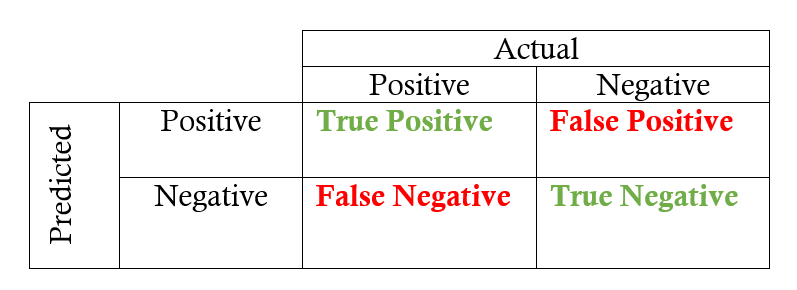

### Accuracy

Accuracy is the quintessential classification metric. It is pretty easy to understand. And easily suited for binary as well as a multiclass classification problem. *Accuracy is the proportion of true results among the total number of cases examined.*
$$Accuracy = (TP+TN)/(TP+FP+FN+TN)$$

   **Advantages**
 
 > Accuracy is a valid choice of evaluation for classification problems which are well balanced and not skewed or no class imbalance.
 
   **Disadvantages**

 > **Imbalanced class**. Say the classification is done for a rare dicease with occurance in only 0.1%. Then a classifier that always returns negative will have a 99.9% accuracy, but is useless. See recall below to see one metric that somewhat remedies the class imbalance problem.
 
 > Accuracy also rely on the assumption that it is **equally costly to have false positive vs. false negatives**. But oftentimes that is not true - the cost of false negative is so much costlier than false postive when diagnosing for the rate disease; see also the performance gap between prod and research above.

### Precision

Let’s start with precision, which answers the following question: *what proportion of predicted Positives is truly Positive?*
$$Precision = (TP)/(TP+FP)$$

High precision means low false positive rate, i.e. **if you test positive, you are probably positive**. In other words, the model is very **cautious about positives**.

   **Advantages**
    
 > Precision is a valid choice of evaluation metric when we want to be very sure of our prediction. 
 
      For example: If we are building a system to predict if we should decrease the credit limit on a particular account, we want to be very sure about our prediction or it may result in customer dissatisfaction.

   **Disadvantages**
    
 > Being very precise means our model will leave a lot of credit defaulters untouched and hence lose money.

### Recall

Another very useful measure is recall, which answers a different question: what proportion of actual Positives is correctly classified?
$$Recall = (TP)/(TP+FN)$$

High recall means that you are **very sensitive to the positives, or are not missing any positives**. In other words, the model is very **lax about positives**. Sometimes people also call recall **sensitivity**, and the true negative rate $TN/(TN+FP)$ the **specificity**.

**Advantages**
> Recall is a valid choice of evaluation metric when we want to capture as many positives as possible.

      
       For example: If we are building a system to predict if a person has cancer or not, we want to capture the disease even if we are not very sure.
 
 > In particular, it address class imbalance problems where the positives in the sample are rare, as compared to accuracy.

**Disadvantages**

 > Recall is 1 if we predict positive for all examples.

## Relation to Hypothesis Testing

In a statistical hypothesis test, there are two possible actions
- reject the null hypothesis (predict $+$), or
- don't reject the null hypothesis (predict $-$).

Then false positive is what we call the **Type I error**, while false negative is the **Type II error**.
- The conceptual mapping is that models with high precision (cautious in positive) has low Type I error, while model with high recall (lax in positive) has low Type II error.

### F1 Score and F beta Score

The F1 score is a number between 0 and 1 and is the *harmonic mean of precision and recall*, which explicitly take into account the tradeoff between precision and recall.

$$F_1=2\times\frac{precision*recall}{precision+recall}$$

**Advantages**
 > We want to have a model with both good precision and recall. 

**Disadvantages**

 > The main problem with the F1 score is that it gives equal weight to precision and recall. We might sometimes need to include domain knowledge in our evaluation where we want to have more recall or more precision.
To solve this, we can do this by creating a weighted F1 metric as below where beta manages the tradeoff between precision and recall. Here we give β times as much importance to recall as precision.

$$F_{\beta}=(1+\beta^2)\frac{precision*recall}{\beta^2\cdot precision+recall}$$

  

### Implementation of the Scores

The above scores for classfication can be easily computed using `sklearn`.

In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score

y_true = [0, 1, 1, 0, 1, 1]
y_pred = [0, 0, 1, 0, 0, 1]

print("Confusion matrix:")
print(confusion_matrix(y_true, y_pred))
print("F1 score:")
print(f1_score(y_true, y_pred))
print("F beta score")
print(fbeta_score(y_true, y_pred,beta=1.0))

Confusion matrix:
[[2 0]
 [2 2]]
F1 score:
0.6666666666666666
F beta score
0.6666666666666666


### AUC and ROC

AUC, or Area Under Curve is the area under the ROC curve. AUC and ROC indicates *how well the probabilities from the positive classes are separated from the negative classes*. 

These methods are for classifiers that produce class probabilities. Given the class probs, one can use various threshold values to plot our *sensitivity, or TPR* and *(1-specificity) or FPR* on the cure and we will have a ROC curve. Here True positive rate or TPR is just the proportion of trues we are capturing using our algorithm, i.e. the recall.

$$Sensitivty = TPR = Recall = TP/(TP+FN)=P(model\;predicts\;1|ground\;truth\;is\;1)$$

and False positive rate or FPR is just the proportion of false we are capturing using our algorithm.

$$1- Specificity = FPR = FP/(TN+FP)=P(model\;predicts\;1|ground\;truth\;is\;0)$$.

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives, and decreasing both False Negative and True Negative  (from bottom left to bottom top right).

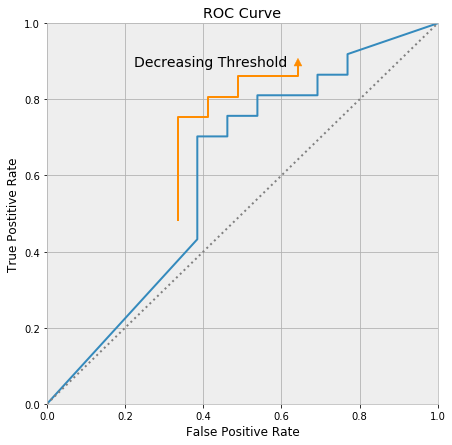

AUC provides an aggregate measure of performance across all possible classification thresholds. 
- One way of interpreting AUC is as the *probability that the model ranks a random positive example more highly than a random negative example*. 
- AUC ranges in value from 0 to 1. 
- A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

We can use the ROC curves to decide on a Threshold value. The choice of threshold value will also depend on how the classifier is intended to be used, sometimes depending on the imbalance of the class, whether we care more about sensitivity or specificity, etc.

Relating to the statistics literature, the AUC is equivalent to the Mann-Whitney-Wilcoxon measure, a well-known ordering measure. It is also equivalent to the Gini Coefficient, with a minor algebraic transformation. See Chapter 8 of DSB for references.

**Advantages**
 > AOC is **scale-invariant**. It measures how well predictions are ranked, rather than their specific model probability values.

 > Another benefit of using AUC is that it is **classification-threshold-invariant** like log loss. Just recall that it is a probability, and that probability is not a function of the threshold. It measures the quality of the model’s predictions irrespective of what classification threshold is chosen, unlike F1 score or accuracy which depend on the choice of threshold.
 
 > **ROC and AUC graphs decouple classier performance from the conditions under which the classifiers will be used**. Specifically, they are independent of the class proportions as well as the costs and benefits. That is, the regions on the ROC graph that are of interest may change as costs, benefits, and class proportions change, but the curves themselves should not.


**Disadvantages**
 > AUC **does not help with determining the threshold of scores or class probs for decision making** - just indicating 'on average' which classification model is better.
 
 > For evaluating whether a predictor to be included can help the classifier, AUC may not be very indicative, even if other metrics like cross entropy is impacted; see examples in Section 9.2.5 in ESL.


### Cumulative Response of Classifiers

The Cumulative Response curve, or the lift curve, is an idea related to the ROC. On the figure, 
- the x-axis is the proportion of the total samples that the classifiers deems positive, given a threshold; 
- y-axis is the percentage of true positive (among all ground truth positives) the classifier gets.

For instance, if the total number of samples is 100. A threshold is chosen so that the top 20 is deemed positive by the classifer. There are 30 ground truth positive amongst the 100, and 15 is amongst the top 20 aforementioned, so the classifier gets 50% of them correctly as positive. Then a point on the cumulative response curve is (20%, 50%). Lift at this point is 50/20 = 2.5x. 

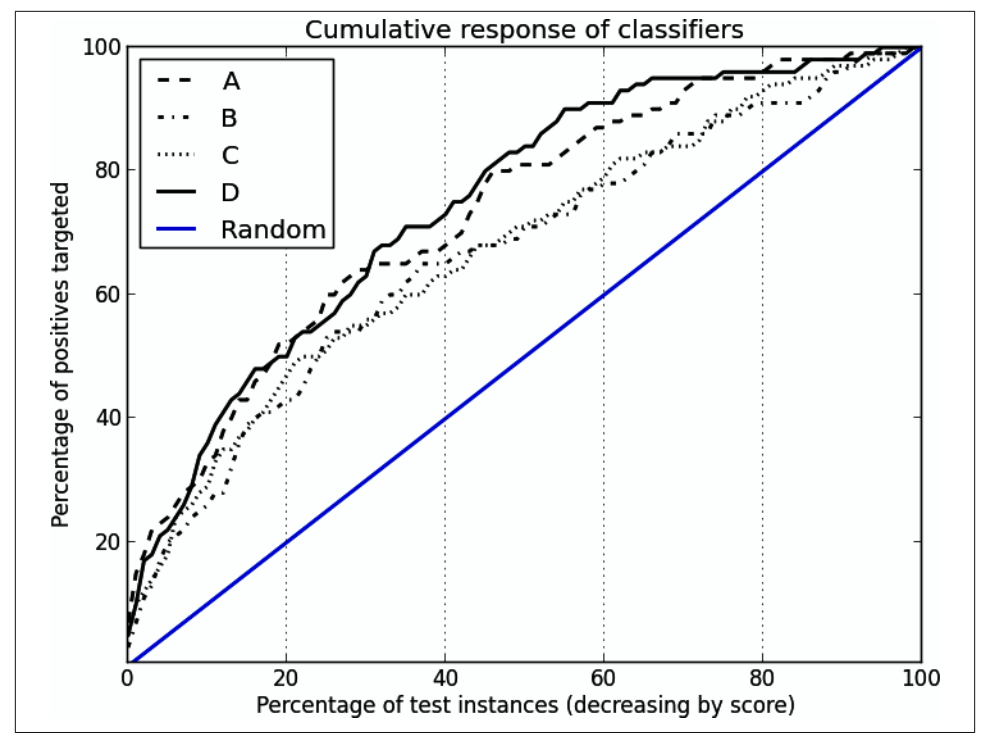

In [2]:
from sklearn.metrics import roc_auc_score
y_true = [0, 0, 1, 1]
y_scores = [0.1, 0.4, 0.35, 0.8]
print(roc_auc_score(y_true, y_scores))


0.75


### Statistical Tests to Compare Classification Models

#### Wilcoxon Signed-rank test

Wilcoxon signed-rank test is a non-parametric version of the paired Student's t-test. It can be used when the sample size is small and the data does not follow a normal distribution. **We can use the Wilcoxon signed-ranked test to see if the two samples diff significantly from each other**. If they do, then one is more accurate than the other.

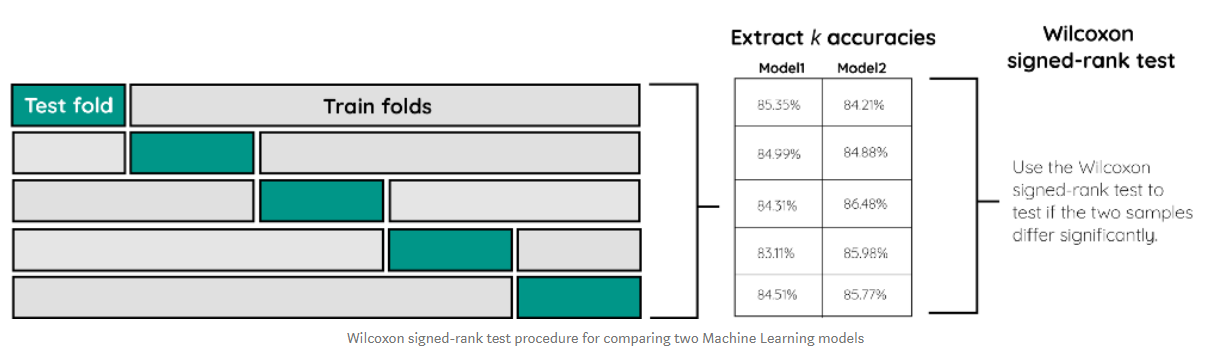

In [ ]:
from scipy.stats import wilcoxon
from sklearn.datasets import load_iris
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

# Load the dataset
X = load_iris().data
y = load_iris().target

# Prepare models and select your CV method
model1 = ExtraTreesClassifier()
model2 = RandomForestClassifier()
kf = KFold(n_splits=20, random_state=42)

# Extract results for each model on the same folds
results_model1 = cross_val_score(model1, X, y, cv=kf)
results_model2 = cross_val_score(model2, X, y, cv=kf)

# Calculate p value
stat, p = wilcoxon(results_model1, results_model2, zero_method='zsplit'); 

#### McNemar's Test

McNemar’s test is used to check **the extent to which the predictions between one model and another match**. This is referred to as the **homogeneity of the contingency table**. Again, if the p-value is lower than 0.05 we can reject the null hypothesis and see that one model is significantly better than the other.

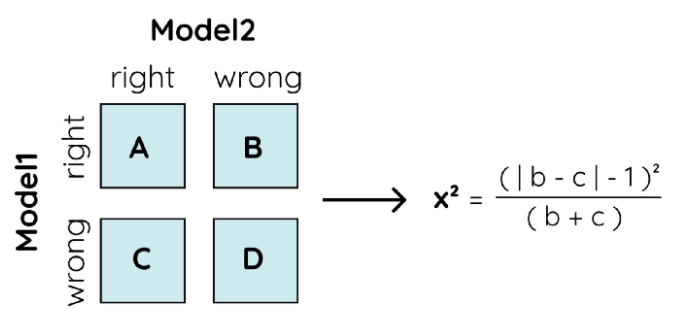

### Log Loss

The log loss, or cross entropy is the loss function used to approximate the 0-1 loss. It is used in the case of logistic regression and neural network, after softmax produces the class probability.

$$-(y\log(p)+(1-y)\log(1-p))$$

**When to Use?**

 > When the output of a classifier is prediction probabilities. Log Loss takes into account the uncertainty of your prediction based on how much it varies from the actual label. This gives us a more nuanced view of the performance of our model. 
 
**Caveats**
 
 > In general, minimizing Log Loss will gives great accuracy for the classifier, as accuracy is what log loss is designed to approximate. But after the ML algo runs, one should check the actual accuracy of the results just to confirm.
 > It is also susceptible for imbalanced classes, where a class weight will be helpful to penalize the errors.

In [3]:
from sklearn.metrics import log_loss  
log_loss(y_true, y_pred, eps=1e-15)

ValueError: Found input variables with inconsistent numbers of samples: [6, 4]

There are also other loss functions used in [boosting](../supervised_learning/boosting.ipynb). Again all of these loss functions are just smooth **surrogate loss** to the 0-1 loss.

## Regression

These should be all familiar. Some of them are differentiable and hence can be directly used as the loss function.

In [ ]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

On finite samples squared-error loss places much more emphasis on observations with large absolute residuals during the fitting process. It is thus far less robust, and its performance severely degrades for long-tailed error distributions and especially for grossly mismeasured y-values (“outliers”). On the other hand, the absolute loss is not differentiable. The Huberized loss combines the best of both worlds.

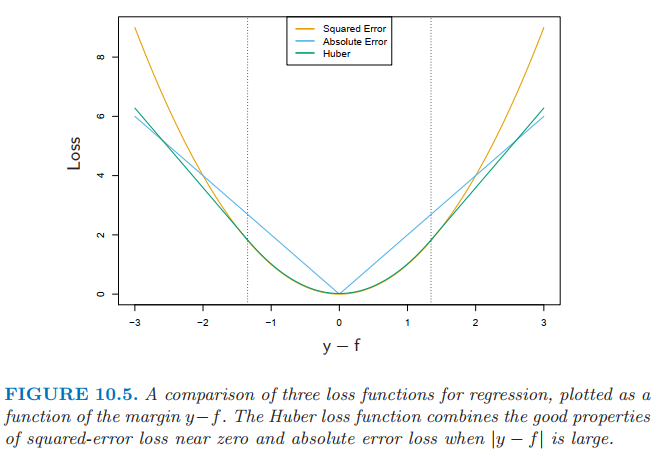

## Statistics and Metrics for Backtesting/Evaluating Investments

### General Characteristics

- **Time range**: Time range specifies the start and end dates. The period used to test the strategy should be sufficiently long to include a comprehensive number of regimes.
- **Average AUM**: This is the average dollar value of the assets under management. For the purpose of computing this average, the dollar value of long and short positions is considered to be a positive real number.
- **Capacity**: A strategy’s capacity can be measured as the highest AUM that delivers a target risk-adjusted performance. Beyond that minimum AUM, performance will decay as AUM increases, due to higher transaction costs and lower turnover.
- **Leverage**: Leverage measures the amount of borrowing needed to achieve the reported performance.
- **Maximum dollar position size**: Maximum dollar position size informs us whether the strategy at times took dollar positions that greatly exceeded the average AUM. In general we will prefer strategies that take maximum dollar positions close to the average AUM, indicating that they do not rely on the occurrence of extreme events (possibly outliers).
- **Ratio of longs**: The ratio of longs show what proportion of the bets involved long positions. In long-short, market neutral strategies, ideally this value is close to $0.5$. If not, the strategy may have a position bias, or the backtested period may be too short and unrepresentative of future market conditions.
- **Frequency of bets**: The frequency of bets is the number of bets per year in the backtest. **A sequence of positions on the same side is considered part of the same bet**. A bet ends when the position is flattened or flipped to the opposite side. The number of bets is always smaller than the number of trades. The rationale for monitoring this is that, **for some market-making type of strategies, the more 'round-traffic' one makes, the more profitable it is**.
- **Average holding period**: The average holding period is the average number of days a bet is held. **Short holding periods may limit the capacity of the strategy**.
- **Annualized turnover**: Annualized turnover measures the ratio of the average dollar amount traded per year to the average annual AUM. 
- **Correlation to underlying**:  When the correlation is significantly positive or negative, the strategy is essentially holding or shortselling the investment universe, without adding much value.


### Performance

- **PnL**
- **PnL from long positions**: This is an interesting value for assessing the bias of long-short, market neutral strategies.
- **Annualized rate of return**
- **Hit ratio**: The fraction of bets that resulted in a positive PnL
- **Average return from hits**: The average return from bets that generated a profit.
- **Average return from misses**: The average return from bets that generated a
loss.

### Runs

- **Returns Concentration**: Define $r^+ = \{r_t|r_t\geq 0\}_{t=1,\dots,T}$ to be positive returns and the positive return concentration is $h^+=\frac{T_+\sum_t(r_t^+)^2/(\sum_tr_t^+)^2-1}{T_+-1}$, where $T_+$ is the number of positive returns. The return concentration has the following nice properties:
    - $0\leq h^+ \leq 1$.
    - $h^+=0$ means there is a uniform distribution among $r^+$.
    - $h^+=1$ means that $r^+$ concentrate on just $1$ element.
    - To visualize, we can plot the time-series and see the same information; but the point of this is to get a metric.

- **Drawdown**: maximum loss suffered by an investment between two consecutive high-watermarks (HWMs)

- **Time Under Water (TuW)**: The time under water (TuW) is the time elapsed between an HWM and the moment the PnL exceeds the previous maximum PnL.

### Implementation Shortfall

- **Broker fees per turnover**: These are the fees paid to the broker for turning the portfolio over, including exchange fees.
- **Average slippage per turnover**: These are execution costs, excluding broker fees, involved in one portfolio turnover. 
- **Dollar performance per turnover**: This is the ratio between dollar performance (including brokerage fees and slippage costs) and total portfolio turnovers. It signifies how much costlier the execution could become before the strategy breaks even.
- **Return on execution costs**: This is the ratio between dollar performance (including brokerage fees and slippage costs) and total execution costs.

### Efficiency Ratios

#### Pros and Cons and Sharpe Ratio

- **Pros**:
    - It is very simple, easy to understand.
    - Resembles the t-stat, which can be viewed as a certainty measure of winning for trading strategies

- **Cons**:
    - Does not incorporate **return distribution info**, especially bad on the tails, skewness and kurtosis. Consider two scenarios where Sharpe ratio misrepresents the risk: 
        - Buying options, where you lose often and small. Before you ever wins big, your Sharpe ratio sucks; 
        - Selling options, where you win often and small. Before you ever lose big, your Sharpe ratio is inflated.
        - By substituting the mean by median in both the numerator and denominator may remedy this problem.
    - **Penalize positive volatility the same way as negative volatility** - introducing Sortino ratio.

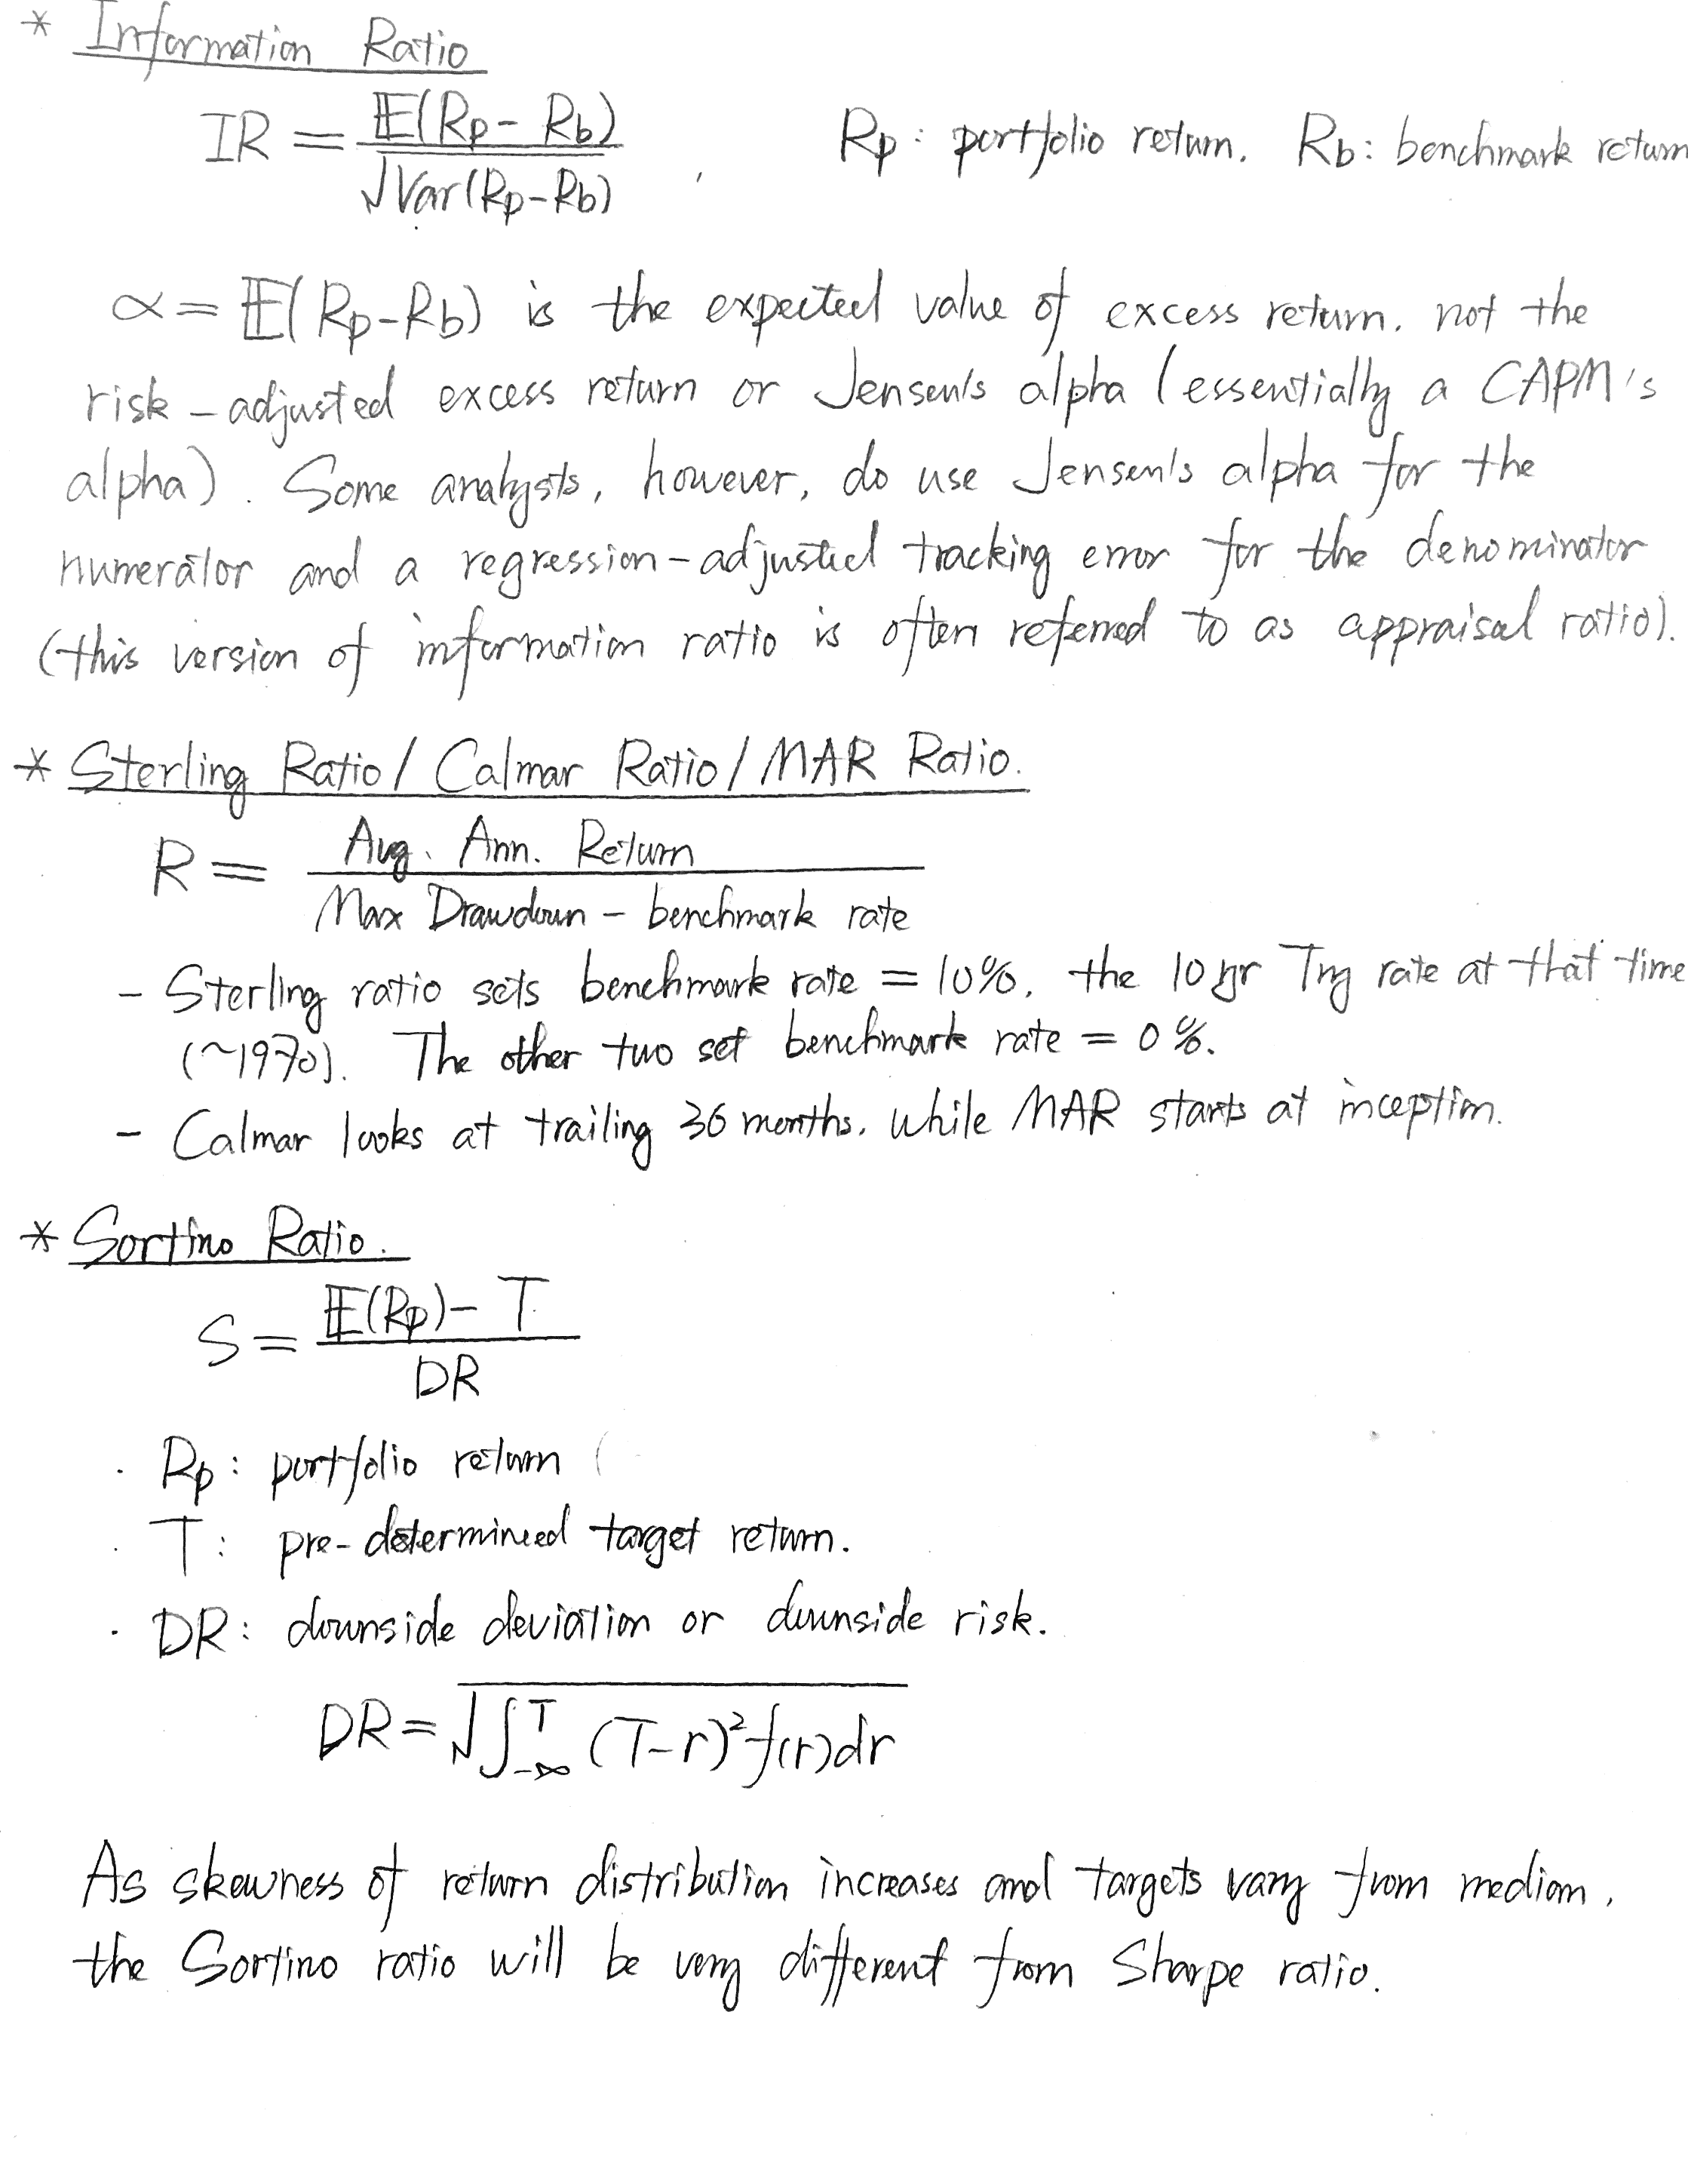

## AIC and BIC
- AIC is a proxy to the value likelihood at MLE taking into account the parameter uncertainty.
- BIC is a proxy to the Bayes factor and normal approximation around MLE. BIC is consistent. BIC usually selects more parsimonious models than AIC.

## Reference

- Medium post: [The 5 Classification Evaluation Metrics You Must Know](https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226)
- [Blog post about AUC and ROC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)
- [Continuous Proof that AUC is the probability](https://www.alexejgossmann.com/auc/)
- [Geometric Proof of the same above](https://madrury.github.io/jekyll/update/statistics/2017/06/21/auc-proof.html)
- `scikit-learn.metrics`: [link](https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226)
- [DSB](https://www.evernote.com/shard/s191/nl/21353936/9aad73d6-a134-4902-8199-de505e5fddbb?title=Data%20Science%20for%20Business), Chapters 7 and 8.
- [ESL](https://www.evernote.com/shard/s191/nl/21353936/c2a0e9ac-da49-4fee-8701-3cd70fc42134?title=The%20Elements%20of%20Statistical%20Learning), Section 9.2.5, Section 10.6
- MLEDU, Lecture 14.
- [< Advances in Financial Machine Learning >](https://www.evernote.com/shard/s191/nl/21353936/49556302-bb13-4b64-9153-2ed8883dc48a?title=Advances%20in%20Financial%20Machine%20Learning), Chapter 14.
- [Validating your Machine Learning Model](https://towardsdatascience.com/validating-your-machine-learning-model-25b4c8643fb7)